In [ ]:
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline

#!sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
#!rm ~/.cache/matplotlib -rf

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/gdrive')

plt.rc('font', family='NanumBarunGothic') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#!pip install --target=$my_path numpy

In [ ]:
gs = pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/GS/GS.csv',  encoding='cp949',parse_dates=['OPER_DT'])

In [ ]:
for i in range(5,13):
  gs.iloc[:,i] = gs.iloc[:,i].str.replace('%','').astype(float)

# **1. 품목별 판매비중 비교**

In [ ]:
overall = gs.groupby(['OPER_DT']).mean()
overall19 = overall.query('OPER_DT < 2020')
overall20 = overall.query('OPER_DT > 2020')

In [ ]:
overall19.index = overall19.index.strftime('%m-%d')
overall20.index = overall20.index.strftime('%m-%d')

In [ ]:
overall20=overall20.drop('02-29')

In [ ]:
overall20.columns

Index(['AMT_IND', 'LCLS_10_P', 'LCLS_20_P', 'LCLS_30_P', 'LCLS_40_P',
       'LCLS_50_P', 'LCLS_60_P', 'LCLS_70_P', 'LCLS_80_P'],
      dtype='object')

In [ ]:
df = pd.concat([overall19,overall20],axis=0)
df.max()

AMT_IND       1.658667
LCLS_10_P    36.788333
LCLS_20_P    48.325000
LCLS_30_P    42.670000
LCLS_40_P     4.148333
LCLS_50_P    13.968333
LCLS_60_P     3.891667
LCLS_70_P     1.448333
LCLS_80_P     0.826667
dtype: float64

In [ ]:
def v_lines(min):
    plt.axvline(x='02-18',color='red')
    plt.text('02-18',min, '신천지', ha='center', va='center',rotation='horizontal', backgroundcolor='white') 
    plt.axvline(x='03-09',color='red')
    plt.text('03-09',min, '마스크 5부제', ha='center', va='center',rotation='horizontal', backgroundcolor='white')
    plt.axvline(x='03-22',color='red')
    plt.text('03-22',min, '사회적 거리두기', ha='center', va='center',rotation='horizontal', backgroundcolor='white')
    plt.axvline(x='04-06',color='red')
    plt.text('04-06',min, '고강도 사회적 거리두기', ha='center', va='center',rotation='horizontal', backgroundcolor='white')
    plt.axvline(x='05-06',color='red')
    plt.text('05-06',min, '생활속 거리두기', ha='center', va='center',rotation='horizontal', backgroundcolor='white')

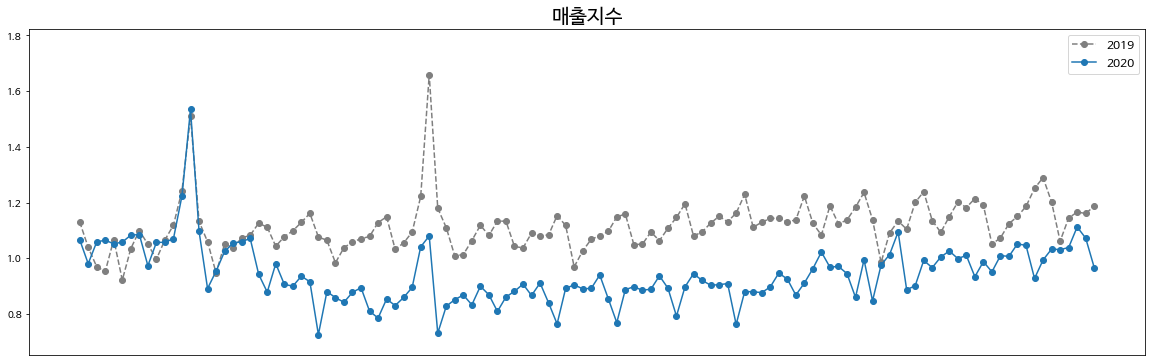

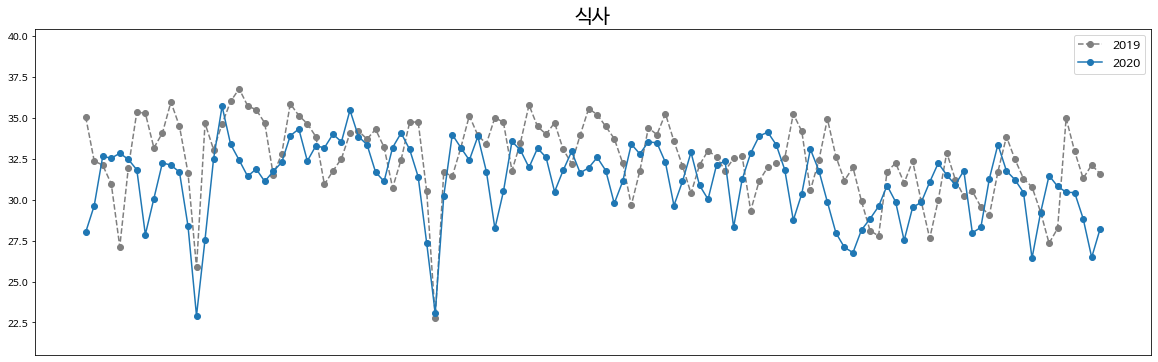

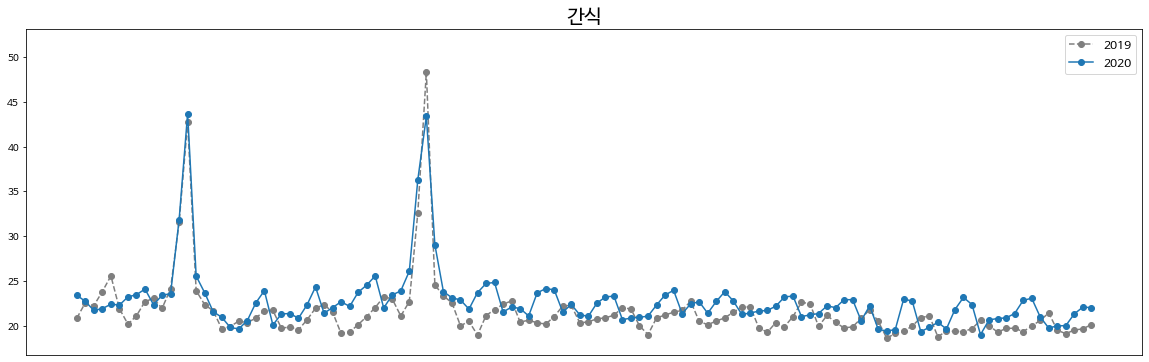

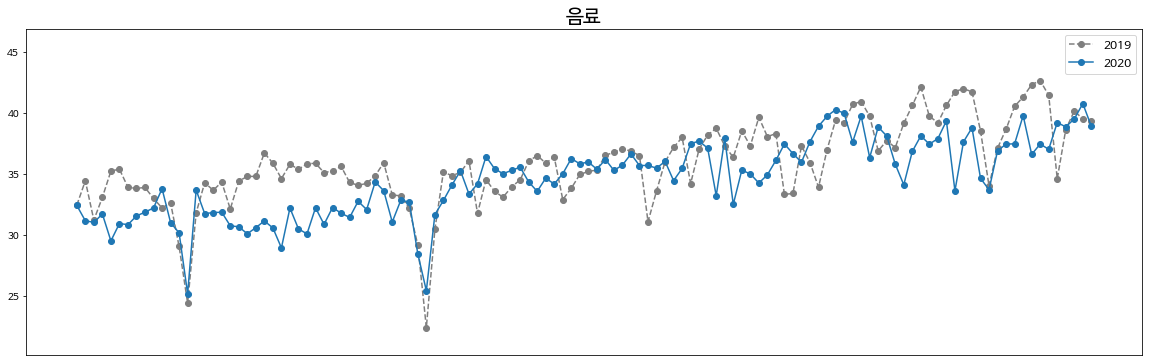

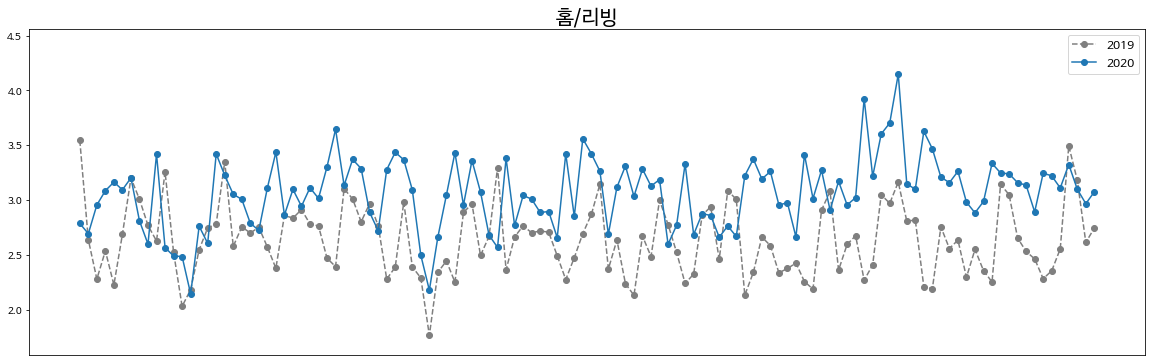

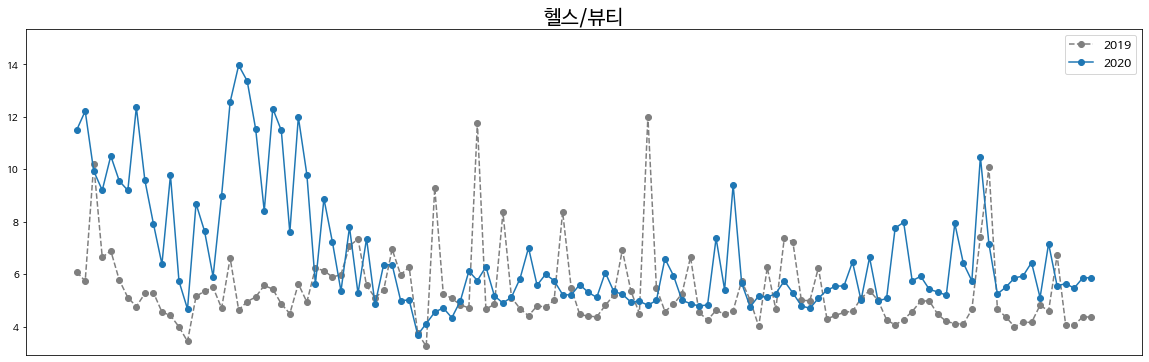

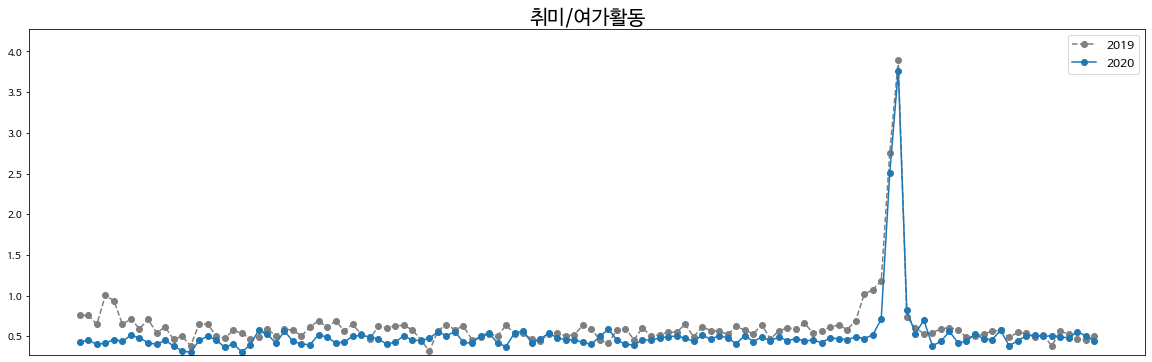

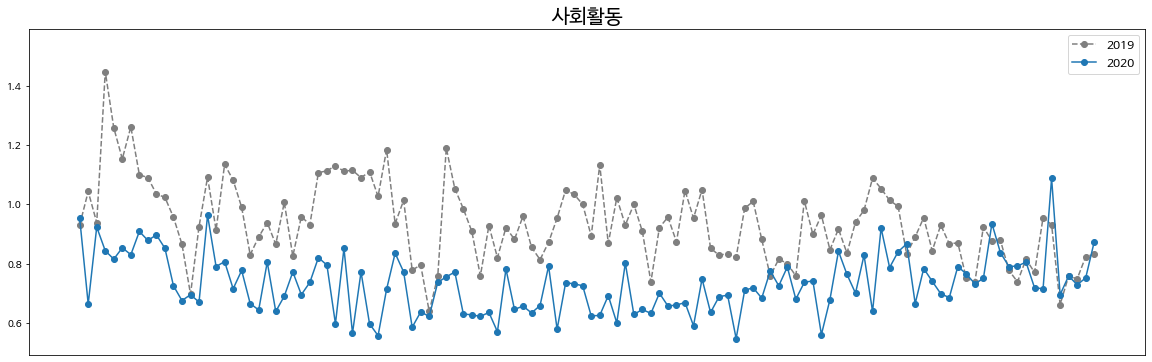

In [ ]:
cat= ['매출지수','식사','간식','음료','홈/리빙','헬스/뷰티','취미/여가활동','사회활동','임신/육아']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f','#1f77b4']
date = []
for i in range(8):
  df = pd.concat([overall19,overall20],axis=0)
  #mid = (overall19.iloc[:,i].min() + overall19.iloc[:,i].max())/2 
  min = df.iloc[:,i].min()
  max = df.iloc[:,i].max()

  plt.figure(figsize=(20, 6))
  plt.ylim(min-min*0.1,max+max*0.1)
  plt.tick_params(axis='x',bottom=False,labelbottom=False)
  line1,=plt.plot(overall19.iloc[:,i],linestyle='--', marker='o',color = '#7f7f7f')
  line2,=plt.plot(overall20.iloc[:,i],marker='o',color = '#1f77b4')
      
  #v_lines(min)
      
  plt.legend(handles=(line1,line2),labels=('2019','2020'),fontsize=12) 

  plt.title(cat[i],fontsize=20)
  plt.show()

# **2. 품목별 판매지수(매출액) 비교**

In [ ]:
overall['AMT_IND_NEW']=overall['AMT_IND']*25359626.37

In [ ]:
overall['LCLS_10_P_NEW']=overall['AMT_IND_NEW']*overall['LCLS_10_P']/100
overall['LCLS_20_P_NEW']=overall['AMT_IND_NEW']*overall['LCLS_20_P']/100
overall['LCLS_30_P_NEW']=overall['AMT_IND_NEW']*overall['LCLS_30_P']/100
overall['LCLS_40_P_NEW']=overall['AMT_IND_NEW']*overall['LCLS_40_P']/100
overall['LCLS_50_P_NEW']=overall['AMT_IND_NEW']*overall['LCLS_50_P']/100
overall['LCLS_60_P_NEW']=overall['AMT_IND_NEW']*overall['LCLS_60_P']/100
overall['LCLS_70_P_NEW']=overall['AMT_IND_NEW']*overall['LCLS_70_P']/100
overall['LCLS_80_P_NEW']=overall['AMT_IND_NEW']*overall['LCLS_80_P']/100

In [ ]:
overall.columns

Index(['AMT_IND', 'LCLS_10_P', 'LCLS_20_P', 'LCLS_30_P', 'LCLS_40_P',
       'LCLS_50_P', 'LCLS_60_P', 'LCLS_70_P', 'LCLS_80_P', 'AMT_IND_NEW',
       'LCLS_10_P_NEW', 'LCLS_20_P_NEW', 'LCLS_30_P_NEW', 'LCLS_40_P_NEW',
       'LCLS_50_P_NEW', 'LCLS_60_P_NEW', 'LCLS_70_P_NEW', 'LCLS_80_P_NEW'],
      dtype='object')

In [ ]:
overall19 = overall.query('OPER_DT < 2020')
overall20 = overall.query('OPER_DT > 2020')
overall19.index = overall19.index.strftime('%m-%d')
overall20.index = overall20.index.strftime('%m-%d')
overall20=overall20.drop('02-29')

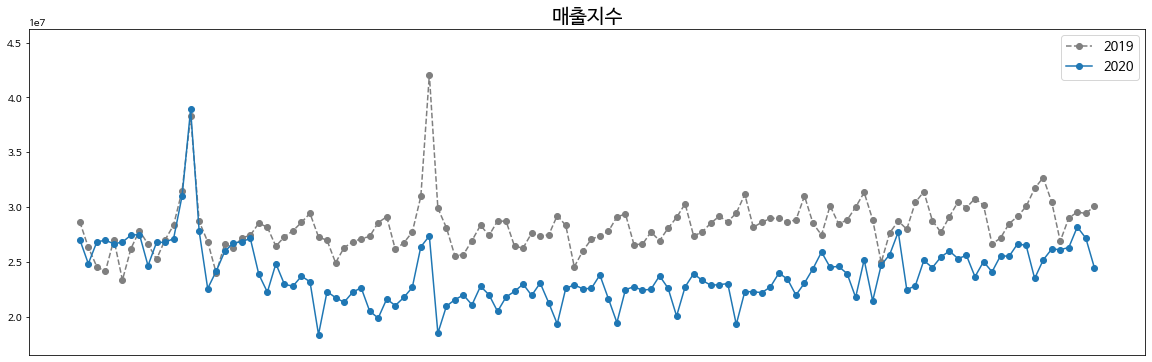

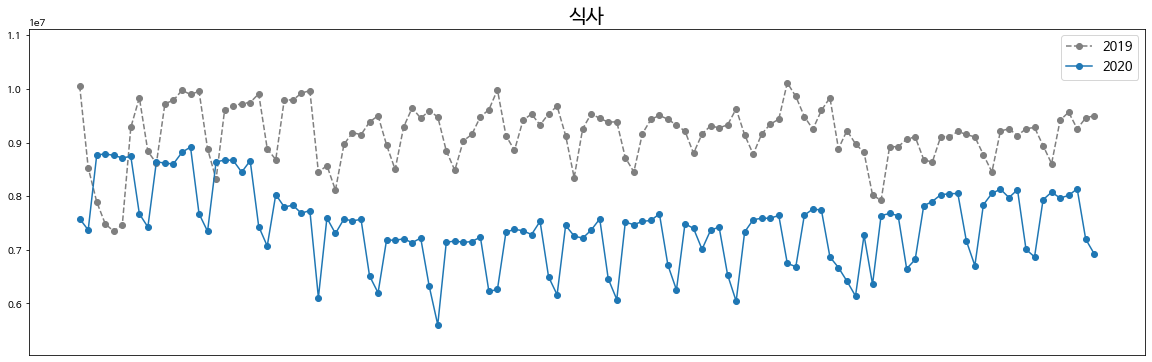

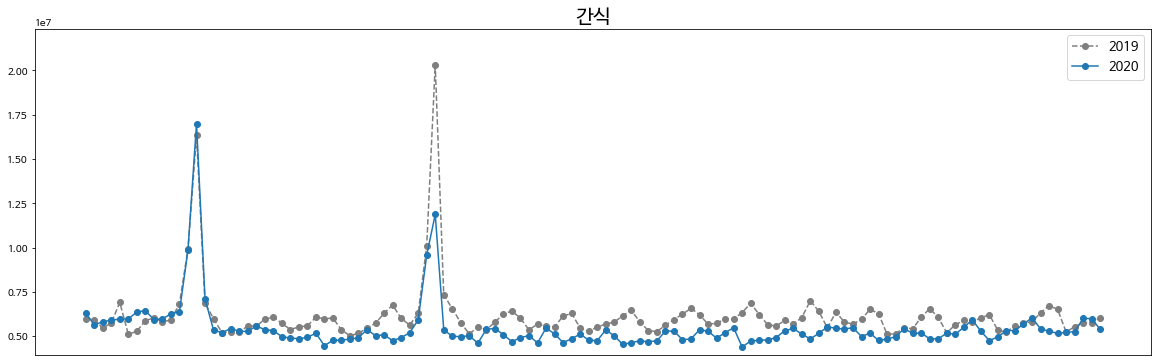

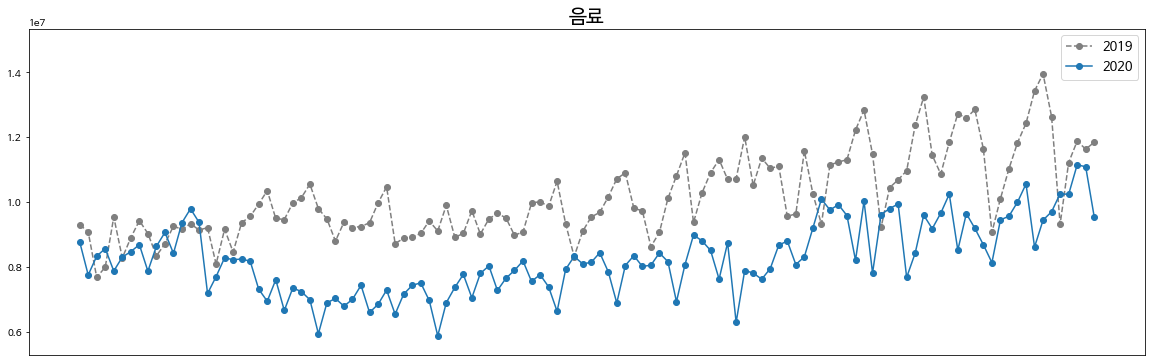

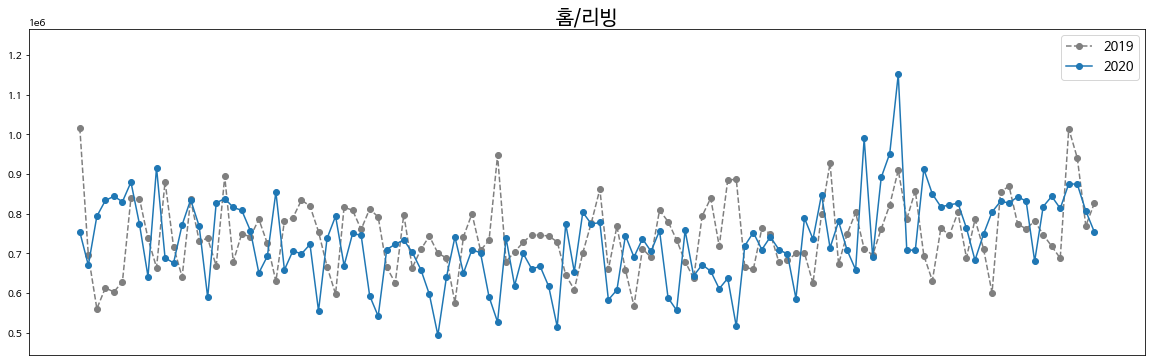

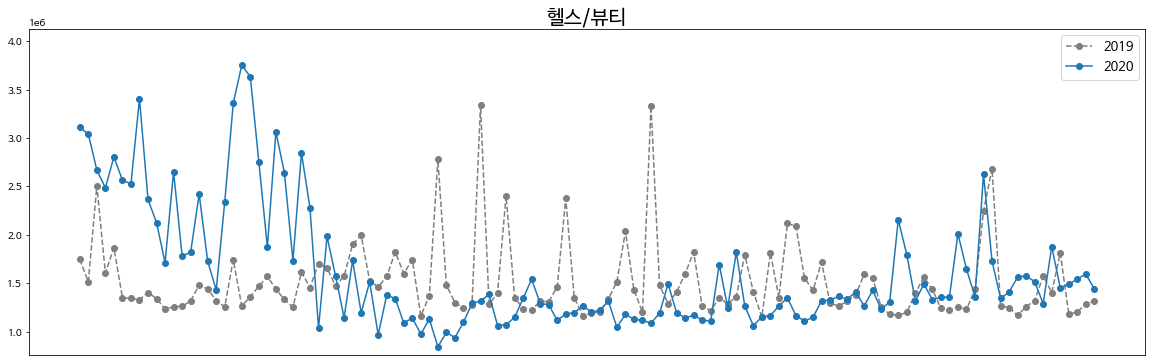

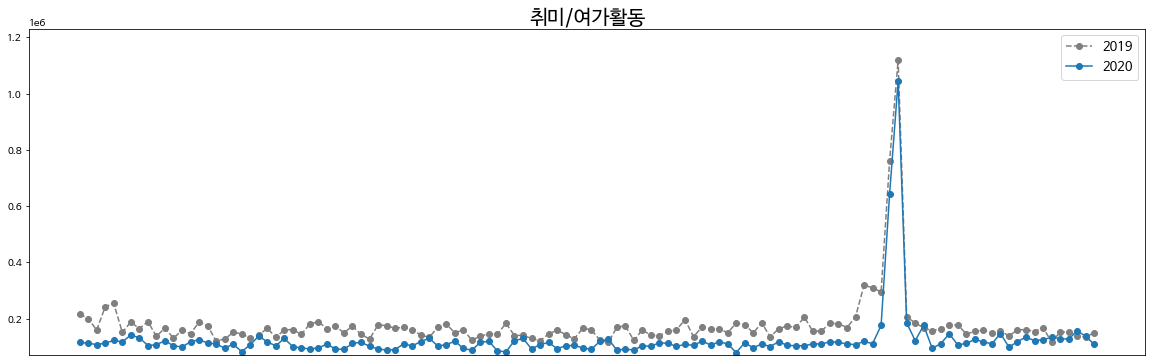

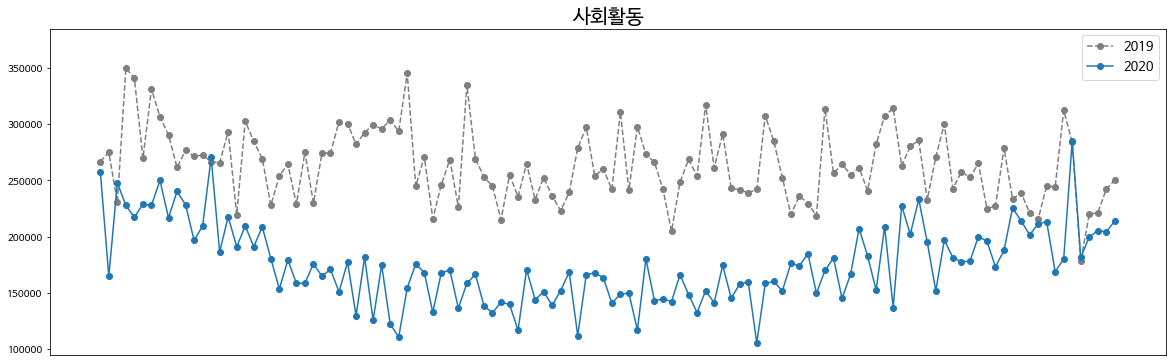

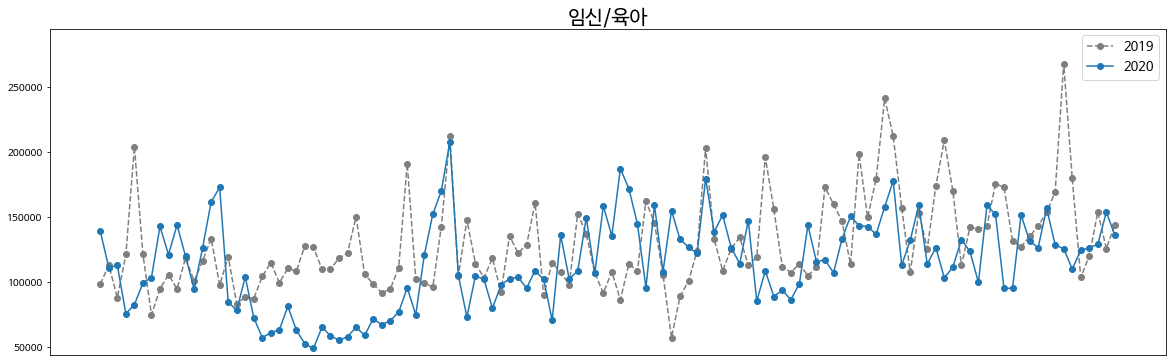

In [ ]:
cat= ['매출지수','식사','간식','음료','홈/리빙','헬스/뷰티','취미/여가활동','사회활동','임신/육아']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f','#1f77b4']
date = []
for i in range(9,18):
  df = pd.concat([overall19,overall20],axis=0)
  #mid = (overall19.iloc[:,i].min() + overall19.iloc[:,i].max())/2 
  min = df.iloc[:,i].min()
  max = df.iloc[:,i].max()

  plt.figure(figsize=(20, 6))
  plt.ylim(min-min*0.1,max+max*0.1)
  plt.tick_params(axis='x',bottom=False,labelbottom=False)
  line1,=plt.plot(overall19.iloc[:,i],linestyle='--', marker='o',color = '#7f7f7f')
  line2,=plt.plot(overall20.iloc[:,i],marker='o',color = '#1f77b4')
      
  #v_lines(min)
      
  plt.legend(handles=(line1,line2),labels=('2019','2020'),fontsize=13) 

  plt.title(cat[i-9],fontsize=20)
  plt.show()

# **3. 품목별 판매지수 증감률 주별 비교**

In [ ]:
gu = pd.read_excel('./gdrive/My Drive/빅콘 대상팀/data/지역데이터/구_동.xlsx')
gs = pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/all_amt.csv',parse_dates=['STD_YMD'])
gs = pd.merge(gu,gs,on='HDONG_NM').query('HDONG_GU == "서울 중구" or HDONG_GU == "서울 노원구"')
gs = gs.groupby(['STD_YMD']).mean()
gs = gs.filter(like='GS')
gs.columns = list(map(lambda x: x[3:],gs.columns.values))

In [ ]:
def growth_week(data):
  sc_cnt_sum_19 =data[data['STD_YMD'] < '2020']
  sc_cnt_sum_20 =data[data['STD_YMD'] > '2020']

  sc_cnt_sum_20.index = sc_cnt_sum_20['STD_YMD']
  del sc_cnt_sum_20['STD_YMD']
  sc_cnt_sum_19.index = sc_cnt_sum_19['STD_YMD']
  del sc_cnt_sum_19['STD_YMD']

  # 요일을 맞춰주기 위한 작업

  #20/02/01 = 일요일
  #19/02/01 = 토요일 ==> 19년 토요일 데이터 삭제
  sc_cnt_sum_19=sc_cnt_sum_19.iloc[1:,]

  #설날 보정
  columns = sc_cnt_sum_19.columns
  index = sc_cnt_sum_19.index

  sc_cnt_sum_19 = np.array(sc_cnt_sum_19)
  sc_cnt_sum_19[2:5,:] = (sc_cnt_sum_19[9:12,:]+sc_cnt_sum_19[16:19,:])/2
  sc_cnt_sum_19 = pd.DataFrame(sc_cnt_sum_19)
  sc_cnt_sum_19.columns = columns
  sc_cnt_sum_19.index = index

  sc_cnt_sum_20 = sc_cnt_sum_20.iloc[:-2,:]

  sc_cnt_sum_19= sc_cnt_sum_19.resample('W-Fri').mean().reset_index()
  sc_cnt_sum_20= sc_cnt_sum_20.resample('W-Fri').mean().reset_index()

  del sc_cnt_sum_19['STD_YMD']
  del sc_cnt_sum_20['STD_YMD']

  sc_cnt_sum_per= (sc_cnt_sum_20-sc_cnt_sum_19)/sc_cnt_sum_19*100

  sc_cnt_sum_per.index = ['2-1', '2-2', '2-3', '2-4', '3-1', '3-2', '3-3', '3-4', '4-1', '4-2', '4-3', '4-4','4-5','5-1', '5-2', '5-3', '5-4']

  return sc_cnt_sum_per


In [ ]:
def v_lines(min,mycolor):
  #plt.axhline(y=0,color=mycolor,linestyle='--')
  plt.axvline(x='2-3',color=mycolor,linestyle='--',linewidth=1)
  plt.text('2-3',min,'신천지', ha='center', va='center',rotation='horizontal', backgroundcolor='white')
  plt.axvline(x='3-2',color=mycolor,linestyle='--',linewidth=1)
  plt.text('3-2',min, '마스크 5부제', ha='center', va='center',rotation='horizontal', backgroundcolor='white')
  plt.axvline(x='3-4', color=mycolor,linestyle='--',linewidth=1)
  plt.text('3-4',min, '사회적 거리두기', ha='center', va='center',rotation='horizontal', backgroundcolor='white')
  plt.axvline(x='4-2', color=mycolor,linestyle='--',linewidth=1)
  plt.text('4-2', min, '고강도 사회적 거리두기', ha='center', va='center',rotation='horizontal', backgroundcolor='white')
  plt.axvline(x='5-1', color=mycolor,linestyle='--',linewidth=1)
  plt.text('5-1',min,'생활속 거리두기', ha='center', va='center',rotation='horizontal', backgroundcolor='white')


In [ ]:
def plot(data, cat,colors = None):
  category =  ['매출지수','식사','간식','마실거리','홈/리빙','헬스/뷰티','취미/여가활동','사회활동','임신육아']
  min = data.min().min()
  max = data.max().max()

  plt.figure(figsize=(20, 6))
  plt.ylim(min-20,max+15)

  notcat = [i for j,i in enumerate(category) if i not in cat]
  for nc in notcat:
    plt.plot(data.loc[:,nc],color='lightgray')

  if colors == None:
    for i,c in enumerate(cat):
      plt.plot(data.loc[:,c],label=c,marker='o')
  else:
    for i,c in enumerate(cat):
      plt.plot(data.loc[:,c],label=c,marker='o',color=colors[i])    
  
  v_lines(min-10,'gray')
  plt.xticks(fontsize=13)
  plt.title('GS리테일 품목별 주차별 평균 증감률(%) 비교',fontsize=20)

  plt.legend(loc='lower center',bbox_to_anchor=(0.5, 0.9),ncol=len(cat),fontsize=12)

  plt.show()      

In [ ]:
gs_per = growth_week(gs.reset_index())

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


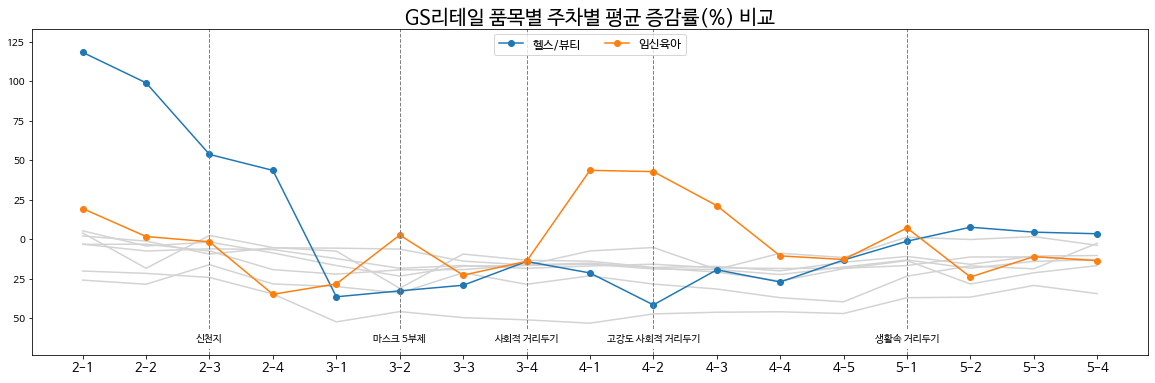

In [ ]:
cat = ['헬스/뷰티','임신육아']
plot(gs_per,cat)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


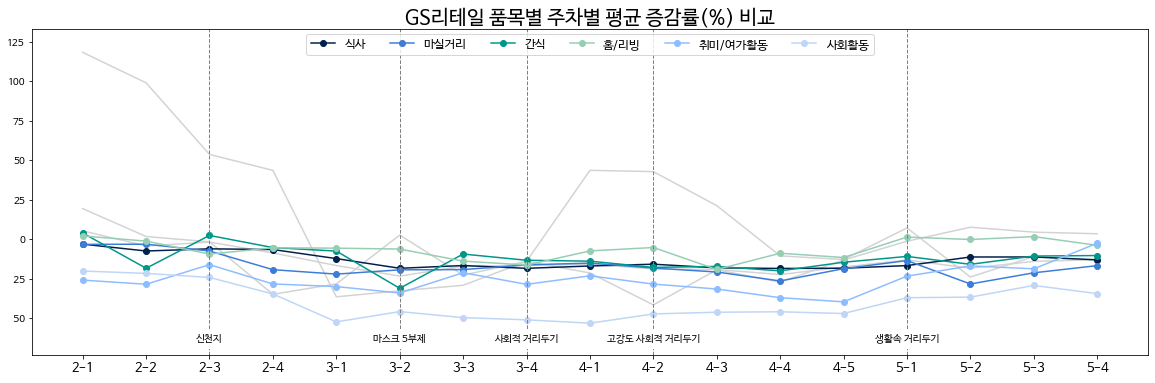

In [ ]:
cat = ['식사','마실거리','간식','홈/리빙','취미/여가활동','사회활동']
colors =  ['#011f4b','#3b7dd8','#009688','#96ceb4','#8dbdff','#bfd6f6']
plot(gs_per,cat,colors=colors)

# **4. 클러스터별 판매지수 비교**

In [ ]:
gs = pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/GS/GS.csv',  encoding='cp949',parse_dates=['OPER_DT'])

for i in range(5,13):
  gs.iloc[:,i] = gs.iloc[:,i].str.replace('%','').astype(float)

In [ ]:
gs_seoul = gs[gs.PVN == '서울특별시']
gs_seoul.columns = ['날짜', '시', '구', '동', '매출지수', '식사', '간식', '마실거리', '홈&리빙', '헬스&뷰티', '취미&여가활동', '사회활동', '임신/육아']

dong = pd.read_csv('./gdrive/My Drive/빅콘 대상팀/data/지역데이터/전체동별클러스터링.csv', sep = ',', encoding='utf-8')
gs_seoul = pd.merge(gs_seoul, dong, left_on='동', right_on='HDONG_NM')
gs_seoul = gs_seoul.drop(['HDONG_NM', 'SIDO_NM'], axis=1)
gs_seoul['년도'] = (gs_seoul['날짜']).dt.year
gs_seoul_am = gs_seoul.copy()

In [ ]:
for i in range(5, 13):
  gs_seoul_am.iloc[:, i] = gs_seoul.iloc[:, 4] * gs_seoul.iloc[:, i]

In [ ]:
gs_seoul = gs_seoul.groupby(['CLUS_NM', '년도']).mean()
gs_seoul_am = gs_seoul_am.groupby(['CLUS_NM', '년도']).mean()
gs_seoul = gs_seoul.reset_index()
gs_seoul_am = gs_seoul_am.reset_index()
gs_seoul = gs_seoul.rename(columns={'CLUS_NM':'클러스터'})
gs_seoul_am = gs_seoul_am.rename(columns={'CLUS_NM':'클러스터'})

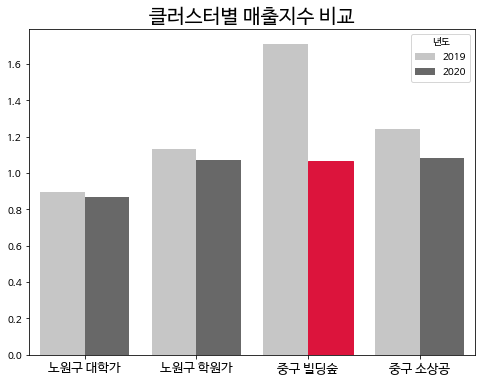

In [ ]:
plt.figure(figsize=(8,6))
clrs = []
ax = sns.barplot(x='클러스터', y='매출지수', hue='년도', data=gs_seoul, palette='Greys')
plt.title('클러스터별 매출지수 비교', fontsize=20)
plt.xticks(fontsize=13)
plt.xlabel('')
plt.ylabel('')

for bar in ax.patches:
    if bar.get_xy() == (2,0):
        bar.set_color('crimson')

# **5. 클러스터별 판매 비율 비교**

In [ ]:
gs_seoul['기타'] = np.sum(gs_seoul.iloc[:,8:], axis=1)
gs_seoul = gs_seoul.drop(['취미&여가활동', '사회활동', '임신/육아'], axis=1)

In [ ]:
gs_seoul

,클러스터,년도,매출지수,식사,간식,마실거리,홈&리빙,헬스&뷰티,기타
0,노원구 대학가,2019,0.898896,29.514167,23.256875,36.726042,2.944167,5.486458,2.067708
1,노원구 대학가,2020,0.869566,29.516322,24.356405,34.771694,3.136570,6.429339,1.787190
2,노원구 학원가,2019,1.132869,32.234643,23.178274,36.069107,2.382440,4.244048,1.894048
3,노원구 학원가,2020,1.072645,31.664817,24.513813,34.397521,2.661570,5.118182,1.643388
4,중구 빌딩숲,2019,1.709979,28.121458,21.228958,37.679375,2.601875,7.610833,2.758333
5,중구 빌딩숲,2020,1.068120,29.911364,19.767149,36.830372,2.863636,8.808264,1.816736
6,중구 소상공,2019,1.245636,31.264470,22.684318,34.471970,3.619015,5.998939,1.964091
7,중구 소상공,2020,1.080902,30.632607,22.894065,33.698798,3.856724,7.095492,1.823140


Text(0, 0.5, '')

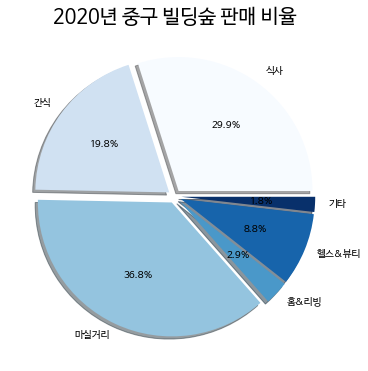

In [ ]:
plt.figure(figsize=(6, 8))
#plt.subplot(121)
#explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
#gs_seoul.iloc[4, 3:].plot.pie(autopct='%0.1f%%', shadow=True, explode=explode, cmap=plt.cm.Blues)
#plt.title('2019년'.format(gs_seoul.클러스터[4]), fontsize=16)
#plt.ylabel('')

#plt.subplot(122)
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05)
gs_seoul.iloc[5, 3:].plot.pie(autopct='%0.1f%%', shadow=True, explode=explode, cmap=plt.cm.Blues)
plt.title('2020년 중구 빌딩숲 판매 비율', fontsize=20)
plt.ylabel('')